In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import os

%load_ext autotime
%matplotlib inline

diri = %pwd
AQ_FILE = "city_hour.csv"

In [2]:
# Read City Hourly Air Pollutant Data to a dataframe
def load_data(file=AQ_FILE):
    aq_path = os.path.join("data", file)
    return pd.read_csv(aq_path)

Error in callback <function LineWatcher.stop at 0x00000234CE377550> (for post_run_cell):


AssertionError: 

In [3]:
df = load_data()
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


time: 1.5 s


In [4]:
del df["AQI_Bucket"], df["AQI"]
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000


time: 412 ms


In [5]:
df["City"].value_counts()

Ahmedabad             48192
Delhi                 48192
Mumbai                48192
Bengaluru             48192
Lucknow               48192
Chennai               48192
Hyderabad             48107
Patna                 44554
Gurugram              40258
Visakhapatnam         35053
Amritsar              29269
Jorapokhar            28025
Jaipur                26705
Thiruvananthapuram    26651
Amaravati             22784
Brajrajnagar          22468
Talcher               22161
Kolkata               19503
Guwahati              12002
Coimbatore             9229
Shillong               7402
Chandigarh             7263
Bhopal                 6903
Kochi                  3854
Ernakulam              3852
Aizawl                 2680
Name: City, dtype: int64

time: 71.8 ms


array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>]], dtype=object)

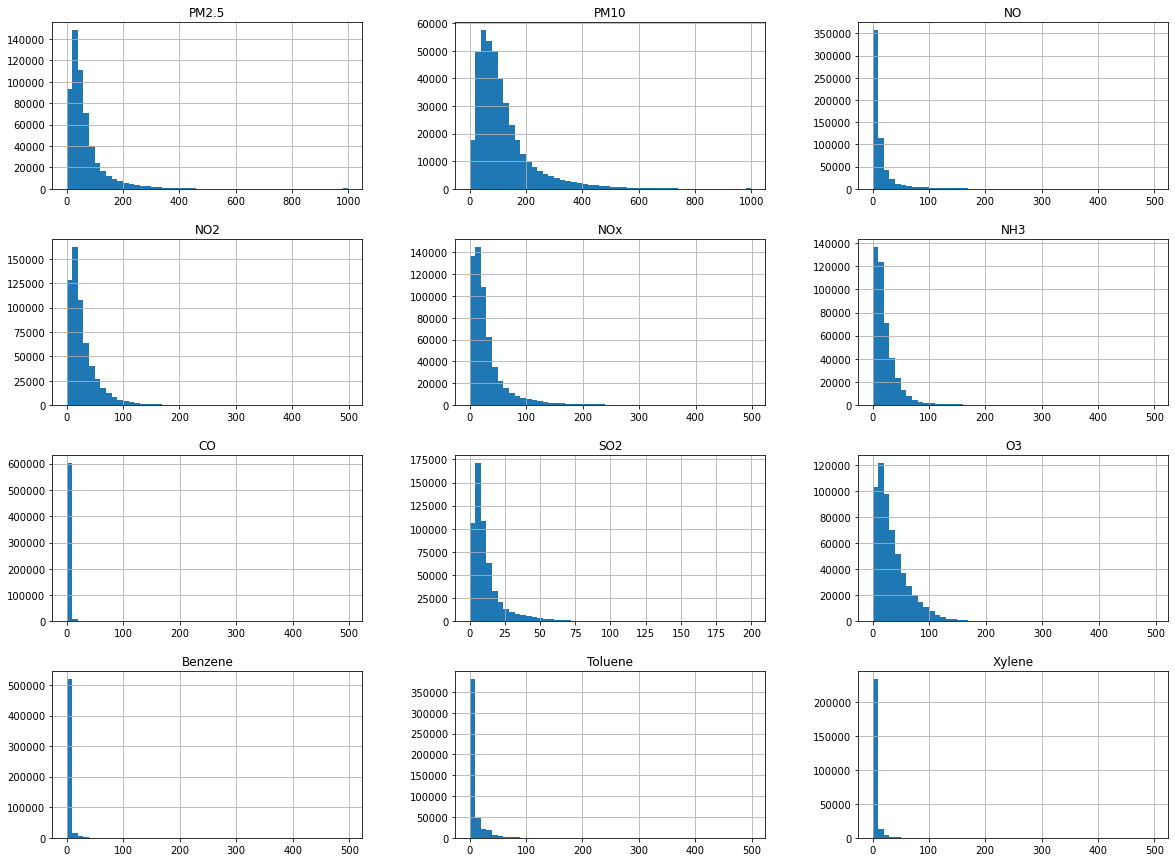

time: 3.23 s


In [6]:
df.hist(bins=50, figsize=(20, 15))

In [7]:
df_delhi = df.loc[df["City"] == "Delhi"]
df_mumbai = df.loc[df["City"] == "Mumbai"]

time: 149 ms


In [8]:
delhi_corr = df_delhi.corr()
mumbai_corr = df_mumbai.corr()
delhi_corr

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.817281,0.552162,0.540812,0.445918,0.530578,0.171963,0.329637,0.162353,0.608801,0.360406,0.133159
PM10,0.817281,1.000000,0.565145,0.613920,0.453250,0.470723,0.145681,0.396602,0.210378,0.591527,0.341744,0.145107
NO,0.552162,0.565145,1.000000,0.613476,0.635065,0.421890,0.100481,0.336522,0.052345,0.628854,0.474171,0.172114
NO2,0.540812,0.613920,0.613476,1.000000,0.583752,0.417747,0.080108,0.494082,0.204884,0.523310,0.300906,0.110852
NOx,0.445918,0.453250,0.635065,0.583752,1.000000,0.300316,0.183557,0.212612,0.204059,0.613619,0.485274,0.196151
NH3,0.530578,0.470723,0.421890,0.417747,0.300316,1.000000,0.274877,0.133928,0.070758,0.384548,0.145082,0.114261
CO,0.171963,0.145681,0.100481,0.080108,0.183557,0.274877,1.000000,-0.086542,-0.043398,0.206835,0.074438,0.300710
SO2,0.329637,0.396602,0.336522,0.494082,0.212612,0.133928,-0.086542,1.000000,0.202664,0.285189,0.120027,-0.020454
O3,0.162353,0.210378,0.052345,0.204884,0.204059,0.070758,-0.043398,0.202664,1.000000,0.087152,-0.125549,-0.029644
Benzene,0.608801,0.591527,0.628854,0.523310,0.613619,0.384548,0.206835,0.285189,0.087152,1.000000,0.641276,0.262516


time: 63.7 ms


In [9]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df_delhi, figsize=(20,15))

Error in callback <function LineWatcher.stop at 0x00000234CE377550> (for post_run_cell):


AssertionError: 

In [10]:
delhi_corr["O3"].sort_values(ascending = False)

O3         1.000000
PM10       0.210378
NO2        0.204884
NOx        0.204059
SO2        0.202664
PM2.5      0.162353
Benzene    0.087152
NH3        0.070758
NO         0.052345
Xylene    -0.029644
CO        -0.043398
Toluene   -0.125549
Name: O3, dtype: float64

time: 8 ms


<AxesSubplot:>

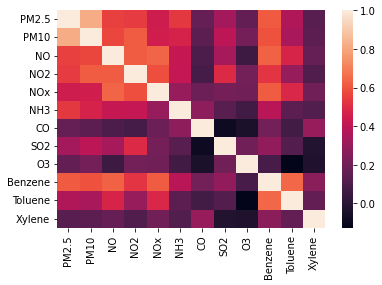

time: 1.08 s


In [11]:
import seaborn as sns
sns.heatmap(df_delhi.corr())

In [12]:
df_delhi = df_delhi.interpolate(method="slinear")
df_mumbai = df_mumbai.interpolate(method="slinear")

time: 246 ms


In [13]:
import scipy.stats as stats
df_delhi = df_delhi.select_dtypes(include='number').apply(stats.zscore)
df_mumbai = df_mumbai.select_dtypes(include='number').apply(stats.zscore)
df_delhi

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
245172,3.549319,4.993929,0.842527,-0.319958,2.638992,-0.709628,2.487074,-1.214841,0.130563,6.727111,2.241700,3.913157
245173,3.400613,5.067917,0.629828,-0.260120,2.417575,-0.700756,3.843976,-1.168162,0.000248,6.063540,1.743413,4.474985
245174,3.070912,5.141905,1.853244,-0.340972,1.685448,-0.640623,9.417816,-1.272445,-0.921708,4.804616,1.178508,4.950851
245175,3.355180,5.215893,0.907210,-0.399385,0.904866,-0.622878,6.727817,-1.123469,-0.899545,3.238712,0.560523,4.840327
245176,3.142321,5.289881,0.420304,-0.475607,0.440361,-0.546972,8.234352,-0.940726,-1.020109,2.354984,0.260468,4.063592
...,...,...,...,...,...,...,...,...,...,...,...,...
293359,-0.777167,-0.753244,-0.649341,-1.014503,-0.836620,-0.592319,-0.359360,-0.496778,-0.188871,-0.593877,0.035156,-0.059553
293360,-0.754977,-0.739370,-0.649142,-0.992063,-0.830486,-0.590840,-0.318550,-0.501744,-0.322141,-0.565969,0.047613,0.032550
293361,-0.715644,-0.709853,-0.650134,-1.061874,-0.854202,-0.587883,-0.332153,-0.540477,-0.341939,-0.584574,-0.054753,0.038690
293362,-0.700184,-0.713604,-0.652118,-1.081464,-0.853589,-0.617949,-0.352558,-0.463010,-0.472550,-0.603179,-0.021173,-0.062624


time: 81.1 ms


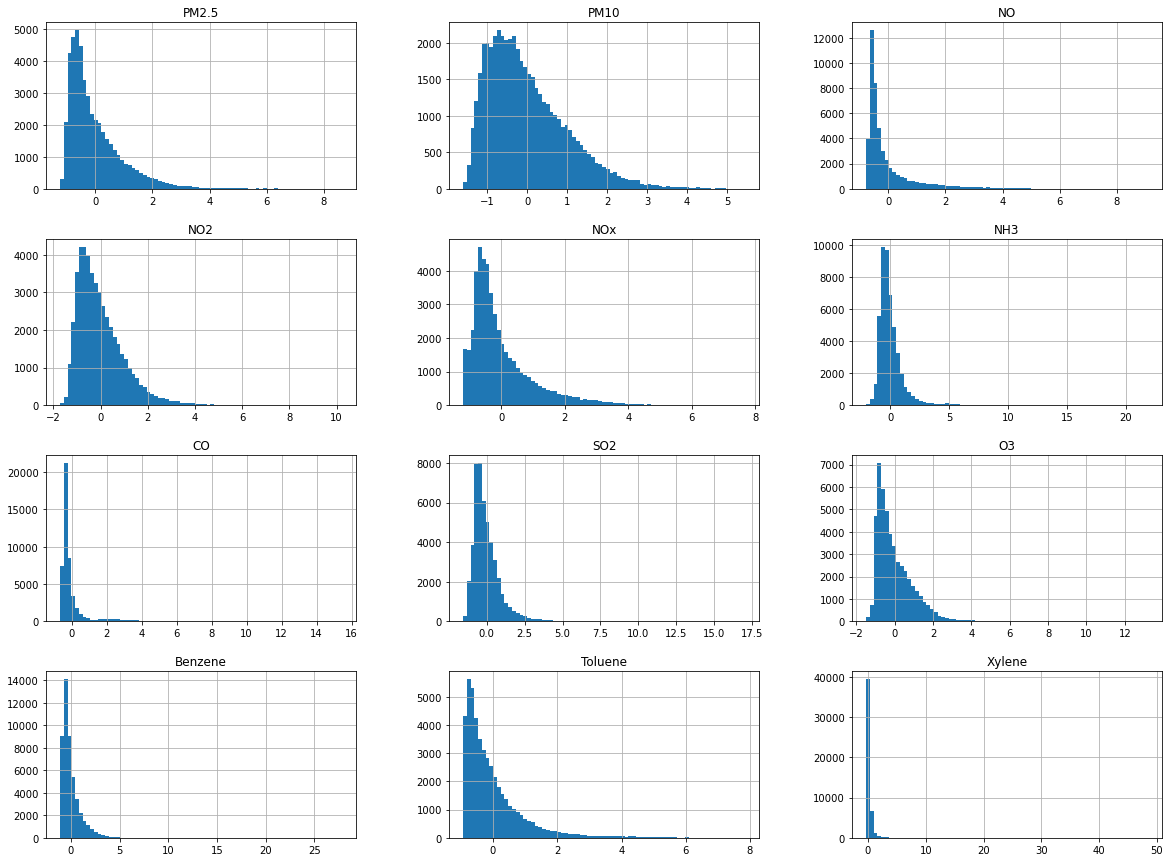

time: 3.75 s


In [14]:
df_delhi.hist(bins=75,figsize=(20,15))
plt.show()

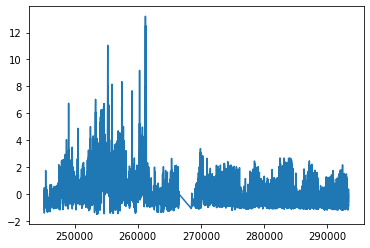

time: 199 ms


In [15]:
plt.plot(df_delhi["O3"])

In [16]:
df_delhi.to_csv("processed_data/delhi_aq.csv")
df_mumbai.to_csv("processed_data/mumbai_aq.csv")

time: 1.84 s
